In [15]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [16]:
# Reading data

train_data = pd.read_csv(r'D:\AI\ML\MNIST Digit Classification\train.csv')
test_data = pd.read_csv(r'D:\AI\ML\MNIST Digit Classification\test.csv')

In [17]:
# Splitting the features and labels

X = train_data.drop('label', axis=1).values
y = train_data['label'].values

In [18]:
# Normalizing the data

X = X / 255.0
X_test = test_data.values / 255.0

In [19]:
# Reshaping the data to fit the model

X = X.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [20]:
# One-hot encoding the labels

y = to_categorical(y)

In [21]:
# Splitting the data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

In [22]:
# Building the CNN model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

C:\Users\balas\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Compiling the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
# Training the model

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7837 - loss: 0.6783 - val_accuracy: 0.9786 - val_loss: 0.0801
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9636 - loss: 0.1216 - val_accuracy: 0.9814 - val_loss: 0.0611
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9751 - loss: 0.0823 - val_accuracy: 0.9852 - val_loss: 0.0457
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9790 - loss: 0.0686 - val_accuracy: 0.9848 - val_loss: 0.0512
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9852 - loss: 0.0512 - val_accuracy: 0.9883 - val_loss: 0.0396
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9862 - loss: 0.0474 - val_accuracy: 0.9905 - val_loss: 0.0337
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9865 - loss: 0.0394 - val_accuracy: 0.9881 - val_loss: 0.0383
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9882 - loss: 0.0365 - val_accuracy: 0.

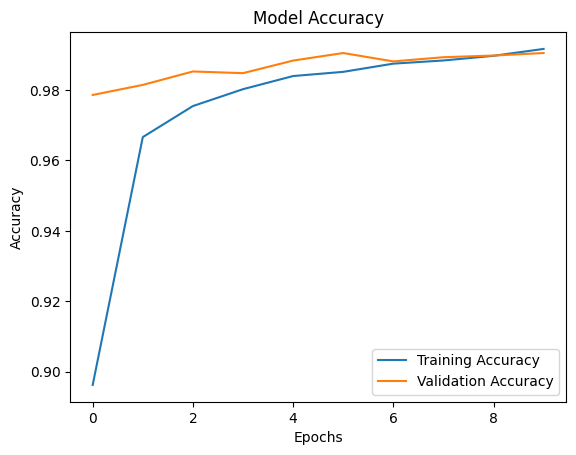

In [25]:
# Plotting training history

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [26]:
# Making predictions on the test data

predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


In [27]:
# Preparing submission file

submission = pd.DataFrame({'ImageId': np.arange(1, len(predictions) + 1), 'Label': predictions})
submission.to_csv('submission.csv', index=False)